In [ ]:
!pip install selenium
!apt-get update
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Ign:1 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:4 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Get:5 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:6 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:12 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hit:13 http://ppa.launchpad.

In [ ]:
import sys
import logging
from selenium.webdriver.remote.remote_connection import LOGGER
LOGGER.setLevel(logging.WARNING)
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
from selenium import webdriver
from selenium.webdriver.common.by import By
from tqdm import tqdm_notebook as tqdm
import pandas
import json
import pprint

In [ ]:
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
chrome_options.add_argument("user-agent=Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/90.0.4430.212 Safari/537.36")

## First connection

In [ ]:
wd = webdriver.Chrome('chromedriver',chrome_options=chrome_options)
import time

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: use options instead of chrome_options
  """Entry point for launching an IPython kernel.


Populating the interactive namespace from numpy and matplotlib


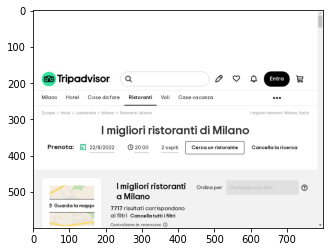

In [ ]:
 wd.get("https://www.tripadvisor.it/Restaurants-g187849-Milan_Lombardy.html")
wd.save_screenshot('screenshot.png')

%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread('/content/screenshot.png')
imgplot = plt.imshow(img)
plt.show()


In [ ]:
print(wd.title)

I MIGLIORI 10 ristoranti a Milano - Aggiornamento di agosto 2022 - Tripadvisor


### How do we extract the values inside a page with CSS Selector?

Selenium has a method called `find_elements(by=By.CSS_SELECTOR, value='..')`.

We will pass our CSS Selector into this method and get a list of selenium elements. Once we have the element, we can extract the text inside it using the `text` function.

In [ ]:
wd.get("https://www.tripadvisor.it/Restaurants-g187849-Milan_Lombardy.html")
time.sleep(10)
list_titles = wd.find_elements(by=By.CSS_SELECTOR, value="div.zdCeB.Vt.o")
print(len(list_titles))

37


# Restaurant List





In [ ]:
list_projects = wd.find_elements(by=By.CSS_SELECTOR, value="div.zdCeB.Vt.o")
print(len(list_projects))

37


In [ ]:
import pprint
detail_projects = []
for project in list_projects:
    url = project.find_elements(by=By.CSS_SELECTOR, value="a")[0].get_attribute("href")
    recensione = ""
  
    if(len(project.find_elements(by=By.CSS_SELECTOR, value=".Lwqic.Cj.b")) > 0):
      title = project.find_elements(by=By.CSS_SELECTOR, value=".Lwqic.Cj.b")[0].text
    if(len(project.find_elements(by=By.CSS_SELECTOR, value=".IiChw")) > 0):
      recensione = project.find_elements(by=By.CSS_SELECTOR, value=".IiChw")[0].text
    restaurant_id = url

    detail_projects.append({'url': url,
                            'title': title,
                            'recensione': recensione,
                            'restaurant_id': restaurant_id})

len(detail_projects)
pprint.pprint(detail_projects[0:5])

[{'recensione': '27 recensioni',
  'restaurant_id': 'https://www.tripadvisor.it/Restaurant_Review-g187849-d23934354-Reviews-I_Barolisti-Milan_Lombardy.html',
  'title': 'I Barolisti',
  'url': 'https://www.tripadvisor.it/Restaurant_Review-g187849-d23934354-Reviews-I_Barolisti-Milan_Lombardy.html'},
 {'recensione': '72 recensioni',
  'restaurant_id': 'https://www.tripadvisor.it/Restaurant_Review-g187849-d24167962-Reviews-Parea_Bistrot-Milan_Lombardy.html',
  'title': '1. Parea Bistrot',
  'url': 'https://www.tripadvisor.it/Restaurant_Review-g187849-d24167962-Reviews-Parea_Bistrot-Milan_Lombardy.html'},
 {'recensione': '758 recensioni',
  'restaurant_id': 'https://www.tripadvisor.it/Restaurant_Review-g187849-d17805000-Reviews-Mabuhay_Restaurant-Milan_Lombardy.html',
  'title': '2. Mabuhay Restaurant',
  'url': 'https://www.tripadvisor.it/Restaurant_Review-g187849-d17805000-Reviews-Mabuhay_Restaurant-Milan_Lombardy.html'},
 {'recensione': '214 recensioni',
  'restaurant_id': 'https://www.

In [ ]:
def parse_project(project):
  url = project.find_elements(by=By.CSS_SELECTOR, value="a")[0].get_attribute("href")
  recensione = ""
  try:
    if(len(project.find_elements(by=By.CSS_SELECTOR, value=".Lwqic.Cj.b")) > 0):
      title = project.find_elements(by=By.CSS_SELECTOR, value=".Lwqic.Cj.b")[0].text
    if(len(project.find_elements(by=By.CSS_SELECTOR, value=".IiChw")) > 0):
      recensione = project.find_elements(by=By.CSS_SELECTOR, value=".IiChw")[0].text
    restaurant_id = url
  except:
    pass
  return {'url': url,
          'title': title,
          'recensione': recensione,
          'restaurant_id': restaurant_id}

In [ ]:
detail_projects = []
wd.get("https://www.tripadvisor.it/Restaurants-g187849-Milan_Lombardy.html")
wd.save_screenshot(f'screenshot.png')
list_projects = wd.find_elements(by=By.CSS_SELECTOR, value="div.zdCeB.Vt.o")
for project in tqdm(list_projects):
  detail_projects.append(parse_project(project))

print(len(detail_projects))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """


  0%|          | 0/35 [00:00<?, ?it/s]

35


### How to end scraping?
Problem: When do we stop?

There are several ways. Some simpler and some more advanced:
- We can search inside the page for the ad number and divide it by 12
- We can check the status of the request (if (status_code == 200):... for a list of possible http status codes please check https://en.wikipedia.org/wiki/List_of_HTTP_status_codes)
- We can check the number of ads found (if > 0...)
- Other more advanced techniques...

For example, in our case, let's go to verify the presence, or not, of the *Snow more* button inside the page. If present, we continue scraping, otherwise we stop.

Actually, we can also combine more than one of these techniques.



In [ ]:
for project in list_projects:
    url = project.find_elements(by=By.CSS_SELECTOR, value="a")[0].get_attribute("href")
    recensione = ""
  
    if(len(project.find_elements(by=By.CSS_SELECTOR, value=".Lwqic.Cj.b")) > 0):
      title = project.find_elements(by=By.CSS_SELECTOR, value=".Lwqic.Cj.b")[0].text
    if(len(project.find_elements(by=By.CSS_SELECTOR, value=".IiChw")) > 0):
      recensione = project.find_elements(by=By.CSS_SELECTOR, value=".IiChw")[0].text
    restaurant_id = url

    detail_projects.append({'url': url,
                            'title': title,
                            'recensione': recensione,
                            'restaurant_id': restaurant_id})

In [ ]:
#Estrazione dei ristoranti fino a 50 pagine
import time
detail_projects = []
wd.get("https://www.tripadvisor.it/Restaurants-g187849-Milan_Lombardy.html")
time.sleep(5)
wd.save_screenshot("check_browser.png")
for num in tqdm(range(1,50)): #50 pagine
  list_projects = wd.find_elements(by=By.CSS_SELECTOR, value=f"div.zdCeB.Vt.o")
  for project in list_projects:
    detail_projects.append(parse_project(project))   
  if (len(wd.find_elements(by=By.CSS_SELECTOR, value=".nav.next.rndBtn.ui_button.primary.taLnk")) > 0):
    link = wd.find_elements(by=By.CSS_SELECTOR, value=".nav.next.rndBtn.ui_button.primary.taLnk")[0].get_attribute("href")
    wd.get(link)
    time.sleep(2) 
  else: 
    break

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  import sys


  0%|          | 0/49 [00:00<?, ?it/s]

In [ ]:
print(len(detail_projects))


1811


# Pandas and data processing

**Well!**
We're starting to see another amazing library for working with data!

It's **pandas**: *Python library for data analysis*.

Basically, with pandas we can manipulate a data set or a historical series in Python.

For now, we start to give a couple of concepts.

Pandas is based on two types of data: **Series** and **DataFrame**:
- `Series` represents a list of data
- `DataFrame` represent a data set in tabular format

Each column of a `DataFrame` is a `Series`.

We can create a `DataFrame` using the `pd.DataFrame` method by passing our dictionary as an input parameter.

A `DataFrame` pandas can be easily exported in *CSV*, *Excel*, ...

For more information about `Pandas` see

https://pandas.pydata.org/getting_started.html


In [ ]:
import pandas as pd
ds_detail_projects = pd.DataFrame(detail_projects)
ds_detail_projects.set_index("restaurant_id")
ds_detail_projects.head()

,url,title,recensione,restaurant_id
0,https://www.tripadvisor.it/Restaurant_Review-g...,South Garage Bistrot,9 recensioni,https://www.tripadvisor.it/Restaurant_Review-g...
1,https://www.tripadvisor.it/Restaurant_Review-g...,1. Parea Bistrot,72 recensioni,https://www.tripadvisor.it/Restaurant_Review-g...
2,https://www.tripadvisor.it/Restaurant_Review-g...,2. Mabuhay Restaurant,758 recensioni,https://www.tripadvisor.it/Restaurant_Review-g...
3,https://www.tripadvisor.it/Restaurant_Review-g...,3. Marea Seafood & Beverage,214 recensioni,https://www.tripadvisor.it/Restaurant_Review-g...
4,https://www.tripadvisor.it/Restaurant_Review-g...,4. BLUE M Milano - Bottega Marchigiana,109 recensioni,https://www.tripadvisor.it/Restaurant_Review-g...


The `.info()` method provides an indication of the structure and data of the `DataFrame`.

In [ ]:
ds_detail_projects.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   url            147 non-null    object
 1   title          147 non-null    object
 2   recensione     147 non-null    object
 3   restaurant_id  147 non-null    object
dtypes: object(4)
memory usage: 4.7+ KB


In [ ]:
ds_detail_projects.to_csv('ds_projectstriptestfinal.csv')

# Tripadvisor Restaurant pages ###

Now, the goal is to navigate and download the details of each restaurant.

**Pandas** provides the *.read_csv* method that allows you to upload in CSV format files within a DataFrame.

In [ ]:
# open csv file
import pandas as pd
ds_detail_projects = pd.read_csv("ds_projectstriptestfinal.csv", index_col="restaurant_id")
ds_detail_projects.head()

,Unnamed: 0,url,title,recensione
restaurant_id,,,,
https://www.tripadvisor.it/Restaurant_Review-g187849-d23699716-Reviews-South_Garage_Bistrot-Milan_Lombardy.html,0,https://www.tripadvisor.it/Restaurant_Review-g...,South Garage Bistrot,9 recensioni
https://www.tripadvisor.it/Restaurant_Review-g187849-d24167962-Reviews-Parea_Bistrot-Milan_Lombardy.html,1,https://www.tripadvisor.it/Restaurant_Review-g...,1. Parea Bistrot,72 recensioni
https://www.tripadvisor.it/Restaurant_Review-g187849-d17805000-Reviews-Mabuhay_Restaurant-Milan_Lombardy.html,2,https://www.tripadvisor.it/Restaurant_Review-g...,2. Mabuhay Restaurant,758 recensioni
https://www.tripadvisor.it/Restaurant_Review-g187849-d23650099-Reviews-Marea_Seafood_Beverage-Milan_Lombardy.html,3,https://www.tripadvisor.it/Restaurant_Review-g...,3. Marea Seafood & Beverage,214 recensioni
https://www.tripadvisor.it/Restaurant_Review-g187849-d15831930-Reviews-BLUE_M_Milano_Bottega_Marchigiana-Milan_Lombardy.html,4,https://www.tripadvisor.it/Restaurant_Review-g...,4. BLUE M Milano - Bottega Marchigiana,109 recensioni


***For each project we go to the link... how do you think we do it?***

Let's try the first 5 projects.



These days most of the web apps are using AJAX techniques. When a page is loaded by the browser, the elements within that page may load at different time intervals. Using waits, we can stop our scraping and wait the loading of a element.

Selenium Webdriver provides two types of waits - implicit & explicit. An explicit wait makes WebDriver wait for a certain condition to occur before proceeding further with execution. An implicit wait makes WebDriver poll the DOM for a certain amount of time when trying to locate an element.


In [ ]:
#Informazioni pagina di dettaglio
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time
details = []
ds_detail_projects = ds_detail_projects.head(n = 1811)
for restaurant_id, project in tqdm(ds_detail_projects.iterrows(), total=ds_detail_projects.shape[0]):
    time.sleep(1)
    link = project["url"]
    indirizzo = ""
    valutazione = ""
    fascia_prezzo = ""
    #print(link)
    try:
      wd.set_window_size(1920, 1080)
      wd.get(link)
      indirizzo = wd.find_elements(by=By.CSS_SELECTOR, value="span.yEWoV")[0].text
      valutazione = wd.find_elements(by=By.CSS_SELECTOR, value="span.ZDEqb")[0].text
      fascia_prezzo = wd.find_elements(by=By.CSS_SELECTOR, value="div.SrqKb")[0].text
      
    except Exception as e:
      print(e)
    details.append({'restaurant_id': restaurant_id,
                    'indirizzo': indirizzo,
                    'valutazione': valutazione,
                    'fascia_prezzo': fascia_prezzo})
  



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  import sys


  0%|          | 0/1811 [00:00<?, ?it/s]

list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range


In [ ]:
print(len(details))
pprint.pprint(details[0:4])

1811
[{'fascia_prezzo': '20 USD - 70 USD',
  'indirizzo': 'Via Eugenio Brizi 4, 20139 Milano Italia',
  'restaurant_id': 'https://www.tripadvisor.it/Restaurant_Review-g187849-d23699716-Reviews-South_Garage_Bistrot-Milan_Lombardy.html',
  'valutazione': '4,5 '},
 {'fascia_prezzo': 'Colazione, Pranzo, Cena',
  'indirizzo': 'Via Vigna 6, 20123 Milano Italia',
  'restaurant_id': 'https://www.tripadvisor.it/Restaurant_Review-g187849-d24167962-Reviews-Parea_Bistrot-Milan_Lombardy.html',
  'valutazione': '5,0 '},
 {'fascia_prezzo': '2 USD - 13 USD',
  'indirizzo': 'Bastioni di Porta Volta 9, 20121 Milano Italia',
  'restaurant_id': 'https://www.tripadvisor.it/Restaurant_Review-g187849-d17805000-Reviews-Mabuhay_Restaurant-Milan_Lombardy.html',
  'valutazione': '5,0 '},
 {'fascia_prezzo': 'Italiana, Pesce, Contemporanea, Mediterranea, Salutistica, '
                   'Ristoranti con bar',
  'indirizzo': 'Via Papa Gregorio XIV, 16, 20123 Milano Italia',
  'restaurant_id': 'https://www.tripadvis

Store the data with *pandas*

In [ ]:
import pandas as pd
ds_details = pd.DataFrame(details)
ds_details.set_index("restaurant_id")
ds_details.head()

,restaurant_id,indirizzo,valutazione,fascia_prezzo
0,https://www.tripadvisor.it/Restaurant_Review-g...,"Via Eugenio Brizi 4, 20139 Milano Italia","4,5",20 USD - 70 USD
1,https://www.tripadvisor.it/Restaurant_Review-g...,"Via Vigna 6, 20123 Milano Italia","5,0","Colazione, Pranzo, Cena"
2,https://www.tripadvisor.it/Restaurant_Review-g...,"Bastioni di Porta Volta 9, 20121 Milano Italia","5,0",2 USD - 13 USD
3,https://www.tripadvisor.it/Restaurant_Review-g...,"Via Papa Gregorio XIV, 16, 20123 Milano Italia","5,0","Italiana, Pesce, Contemporanea, Mediterranea, ..."
4,https://www.tripadvisor.it/Restaurant_Review-g...,Via Lanzone 27 Sant'Ambrogio - Università Catt...,"5,0",10 USD - 40 USD


In [ ]:
ds_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   restaurant_id  10 non-null     object
 1   indirizzo      10 non-null     object
 2   valutazione    10 non-null     object
dtypes: object(3)
memory usage: 368.0+ bytes


In [ ]:
ds_details.to_csv("ds_project_detailstriptestdetailsfinal.csv")